# Take a look at the synthetic model (the true model)

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

import verde as vd

import discretize
import SimPEG
from SimPEG import dask  # run in parallel
from SimPEG.utils import io_utils

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

import verde as vd

import discretize

In [3]:
assets_path = Path("3_blocks_model") / "Assets"
mesh_fname = assets_path / "mesh_CaMP.ubc"
model_fname = assets_path / "CaMP_grav_synthetic_model.ubc"

Load synthetic model (mesh and densities)

In [4]:
mesh = discretize.TreeMesh.read_UBC(mesh_fname)
mesh

OcTreeMesh: 12.96% filled

Level : Number of cells               Mesh Extent               Cell Widths    
-----------------------           min     ,     max            min   ,   max   
  3   :       100            ---------------------------   --------------------
  4   :       636         x:   -16000.0   ,   16000.0        250.0   ,   4000.0  
  5   :      2120         y:   -16000.0   ,   16000.0        250.0   ,   4000.0  
  6   :      6368         z:    -6400.0   ,     0.0          100.0   ,   1600.0  
  7   :     126720     
-----------------------
Total :     135944

In [5]:
model = mesh.read_model_UBC(model_fname)
model

array([0., 0., 0., ..., 0., 0., 0.])

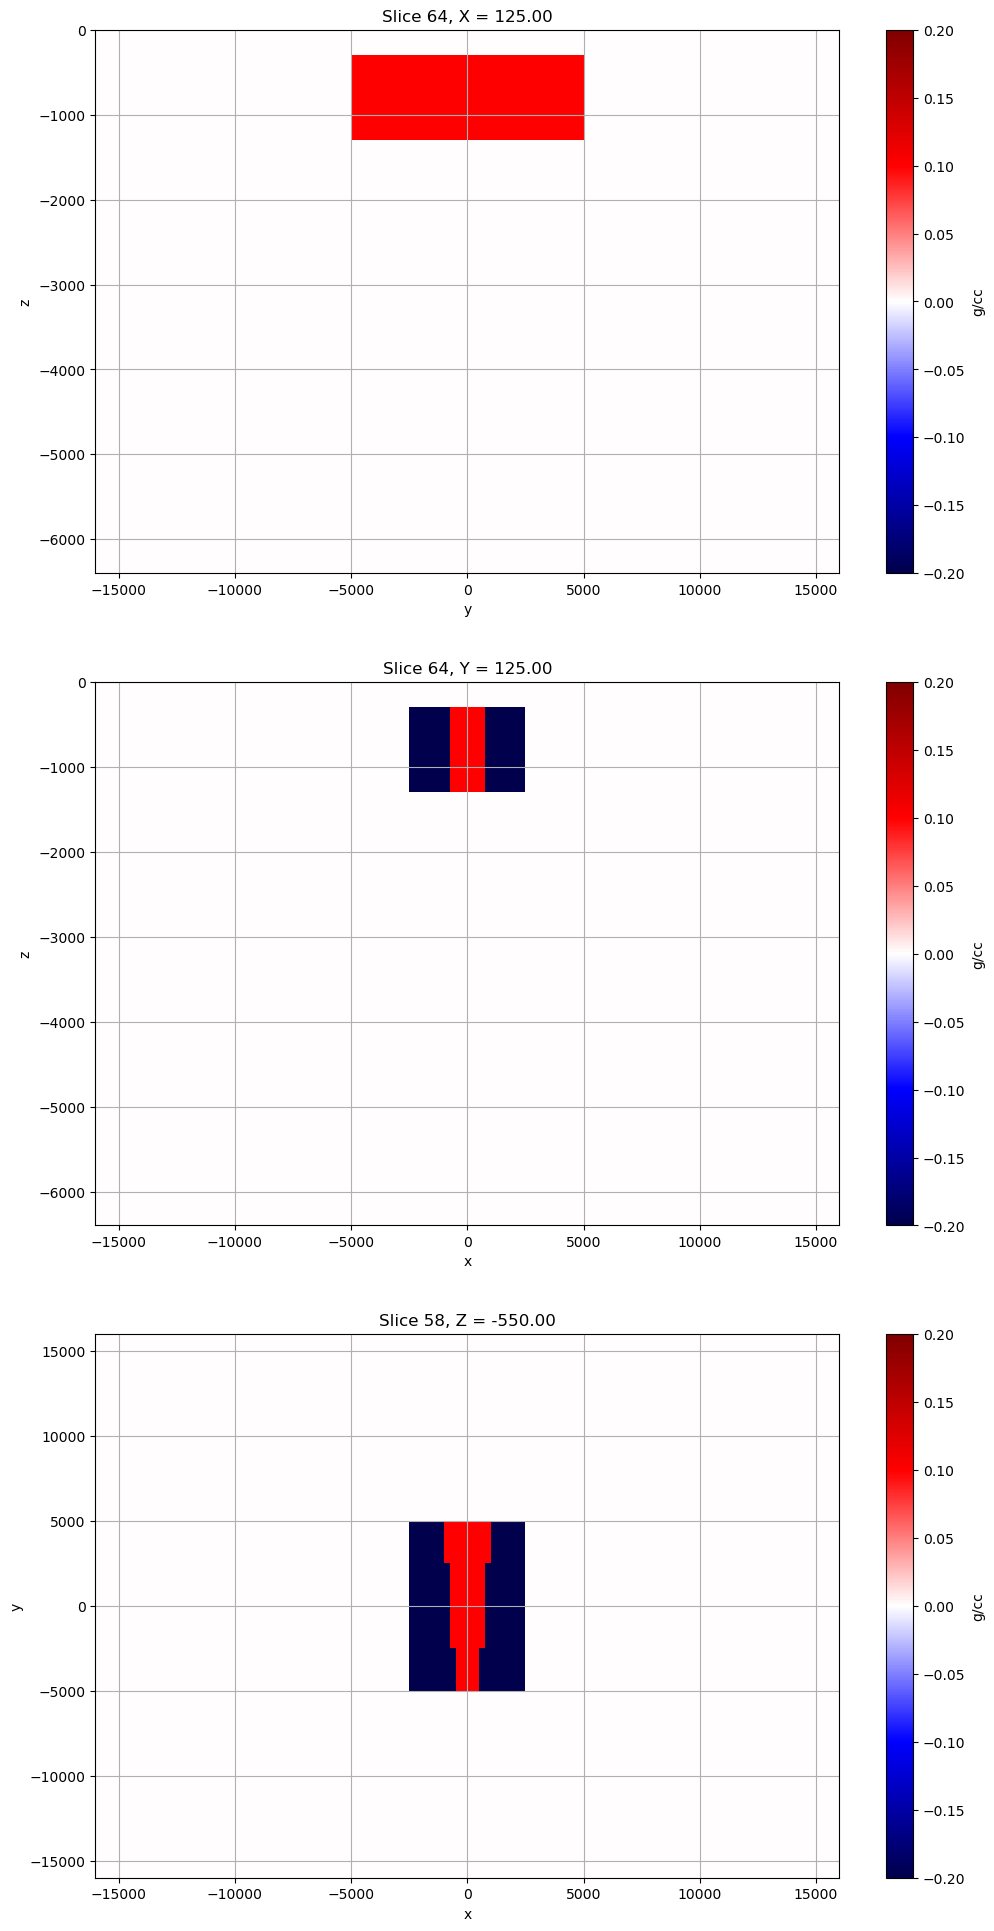

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 24))

maxabs = vd.maxabs(model)
clim = (-maxabs, maxabs)

for direction, slice_loc, ax in zip("x y z".split(), (None, None, -500), (ax1, ax2, ax3)):
    tmp, = mesh.plot_slice(
        model,
        normal=direction,
        slice_loc=slice_loc,
        clim=clim,
        ax=ax,
        pcolor_opts={"cmap": "seismic"},
    )
    plt.colorbar(tmp, ax=ax, label="g/cc")
    ax.grid()
plt.show()